In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = pd.read_csv('/content/Sales.csv')

In [4]:
x = data['GrLivArea']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]


In [5]:
alpha = 0.01
iterations = 2000
m = y.size
np.random.seed(123)
theta = np.random.rand(2)

In [6]:
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1 / (2 * m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1 / m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs

In [7]:
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [8]:
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


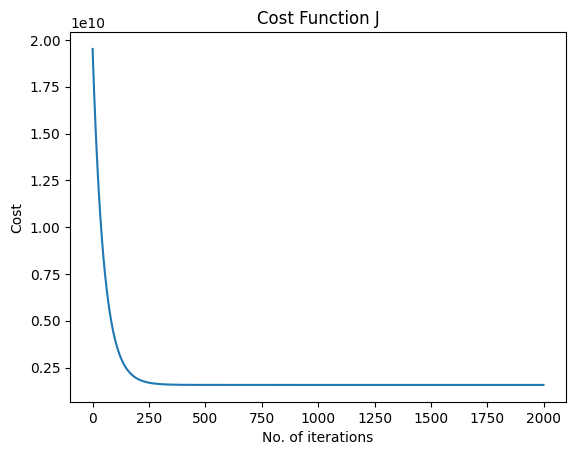

In [10]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [11]:
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:, 1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

In [12]:
def set_animate(i):
  x = np.linspace(-5, 20, 1000)
  y = past_thetas[i][1]*x + past_thetas[i][0]
  line.set_data(x, y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
  return line, annotation

  anim = animation.FuncAnimation(fig, set_animate, frames=len(past_thetas), interval=100, blit=True)
  anim.save('animation.gif', writer='imagemagick', fps = 30)

In [ ]:
import io
import base64
from IPython.display import HTML
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

IndexError: list index out of range

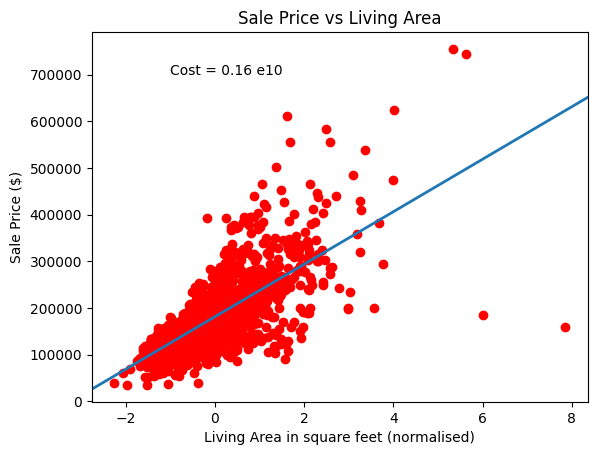

In [21]:
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# Assuming past_thetas and past_costs are defined
# and that there is data to plot

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
# Assuming x and y are defined
plt.scatter(x[:, 1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)

def set_animate(i):
    x_ = np.linspace(-5, 20, 1000) # Avoid using x as a variable name again
    y_ = past_thetas[i][1]*x_ + past_thetas[i][0] # Avoid using y as a variable name again
    line.set_data(x_, y_)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, set_animate, frames=len(past_thetas), interval=100, blit=True)
anim.save('animation.gif', writer='imagemagick', fps = 30)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

plt.show() # Add this line to display the plot

In [22]:
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# Assuming past_thetas and past_costs are defined
# and that there is data to plot

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
# Assuming x and y are defined
#plt.scatter(x[:, 1], y, color='red') #commented out since x and y are not defined in the global scope
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)

def set_animate(i):
    x_ = np.linspace(-5, 20, 1000) # Avoid using x as a variable name again
    y_ = past_thetas[i][1]*x_ + past_thetas[i][0] # Avoid using y as a variable name again
    line.set_data(x_, y_)
    if i < len(past_costs): # Check if the index is within the bounds of past_costs
        annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    else:
        annotation.set_text('Cost = N/A') # Set a default value if past_costs is too short
    return line, annotation

anim = animation.FuncAnimation(fig, set_animate, frames=len(past_thetas), interval=100, blit=True)
anim.save('animation.gif', writer='imagemagick', fps = 30)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

plt.show() # Add this line to display the plot

ValueError: Image size of 4777x-1942967037 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>